In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

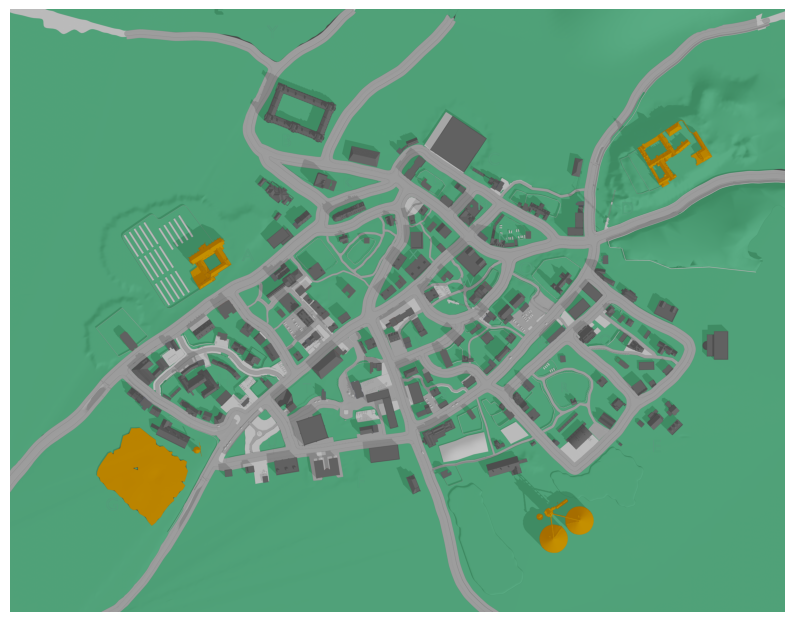

Processed image saved at: /Volumes/TwoTeras/Resources/processed_green_map.png


In [15]:


def replace_colors(image_path, output_path):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Define color ranges in BGR format
    lower_red = np.array([0, 0, 150], dtype=np.uint8)
    upper_red = np.array([100, 100, 255], dtype=np.uint8)

    lower_blue = np.array([150, 0, 0], dtype=np.uint8)
    upper_blue = np.array([255, 100, 100], dtype=np.uint8)

    lower_magenta = np.array([150, 0, 150], dtype=np.uint8)
    upper_magenta = np.array([255, 100, 255], dtype=np.uint8)

    # Create masks
    mask_red = cv2.inRange(image, lower_red, upper_red)
    mask_blue = cv2.inRange(image, lower_blue, upper_blue)
    mask_magenta = cv2.inRange(image, lower_magenta, upper_magenta)

    # Combine masks for red and blue
    mask = cv2.bitwise_or(mask_red, mask_blue)

    # Define the replacement gray color (BGR format) as #616161 (RGB 97,97,97)
    replacement_gray = np.array([97, 97, 97], dtype=np.uint8)  # Dark gray for all red & blue areas

    # Detect the most common green shade in the background
    green_pixels = image[(image[:, :, 1] > image[:, :, 0]) & (image[:, :, 1] > image[:, :, 2])]
    common_green = np.median(green_pixels, axis=0).astype(np.uint8) if len(green_pixels) > 0 else np.array([0, 128, 0], dtype=np.uint8)

    # Apply the dark gray replacement to red & blue areas
    image[np.where(mask > 0)] = replacement_gray

    # Replace magenta areas with green
    image[np.where(mask_magenta > 0)] = common_green

    # Save processed image
    cv2.imwrite(output_path, image)

    # Display results
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()

    print(f"Processed image saved at: {output_path}")



# Example usage
input_image_path = "/Users/tracysanchezpacheco/Library/CloudStorage/OneDrive-Personal/PhD/Virtual reality/Photos-Maps/SyLquJ_h.png"  # Replace with your image path
output_image_path = "/Volumes/TwoTeras/Resources/processed_green_map.png"

replace_colors(input_image_path, output_image_path)


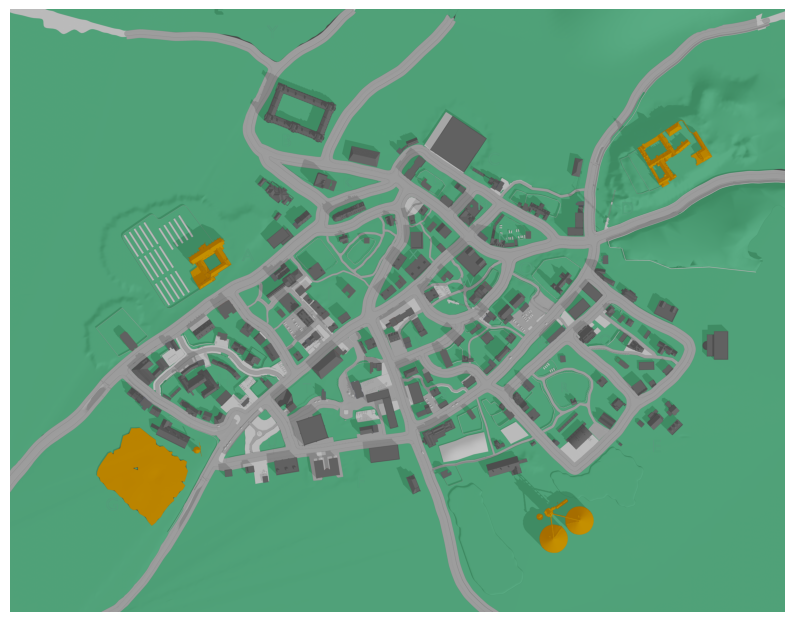

Processed image saved at: /Volumes/TwoTeras/Resources/processed_green_map.png


In [11]:


d